In [45]:
#Classification
 #Read the csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\Pratiksha\OneDrive\Desktop\Churn_prediction - Copy\Churn_prediction\dataset\customer_churn_dataset-testing-master.csv")

In [46]:
 #print csv data set
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [47]:
data.shape

(64374, 12)

In [48]:
# get info of the csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [49]:
#Get the describes of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,64374.0,32187.500000,18583.317451,1.0,16094.25,32187.5,48280.75,64374.0
Age,64374.0,41.970982,13.924911,18.0,30.00,42.0,54.00,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.00,33.0,47.00,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.00,15.0,23.00,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.00,6.0,8.00,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.00,19.0,25.00,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.00,534.0,768.00,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.00,15.0,23.00,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.00,0.0,1.00,1.0


In [50]:
#Check for null vlues
print(data.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [51]:
# check for duplicates and drop it
data.duplicated().sum()

np.int64(0)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [53]:
# check for unique and value counts
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [54]:
data['Gender'].value_counts()

Gender
Female    34353
Male      30021
Name: count, dtype: int64

In [55]:
data['Subscription Type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

In [56]:
data['Subscription Type'].value_counts()

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

In [57]:
data['Contract Length'].unique()

array(['Monthly', 'Annual', 'Quarterly'], dtype=object)

In [58]:
data['Contract Length'].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

In [59]:
# Either map it or else do labelEncoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Gender']=lb.fit_transform(data['Gender'])

In [60]:
data['Gender'].unique()

array([0, 1])

In [61]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Subscription Type']=lb.fit_transform(data['Subscription Type'])

In [62]:
data['Subscription Type'].unique()

array([0, 2, 1])

In [63]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Contract Length']=lb.fit_transform(data['Contract Length'])

In [64]:
data['Contract Length'].unique()

array([1, 0, 2])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         64374 non-null  int64
 1   Age                64374 non-null  int64
 2   Gender             64374 non-null  int64
 3   Tenure             64374 non-null  int64
 4   Usage Frequency    64374 non-null  int64
 5   Support Calls      64374 non-null  int64
 6   Payment Delay      64374 non-null  int64
 7   Subscription Type  64374 non-null  int64
 8   Contract Length    64374 non-null  int64
 9   Total Spend        64374 non-null  int64
 10  Last Interaction   64374 non-null  int64
 11  Churn              64374 non-null  int64
dtypes: int64(12)
memory usage: 5.9 MB


Contract Length
1    22130
0    21410
2    20834
Name: count, dtype: int64


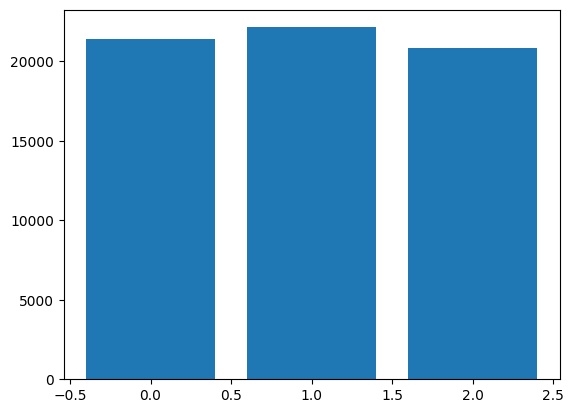

In [66]:
# Visualisation using line , bar or pie chart.
s = data['Contract Length'].value_counts()
type(s)
print(s)
x = s.index
y = s.values
import matplotlib.pyplot as plt
plt.bar(x,y)
plt.show()

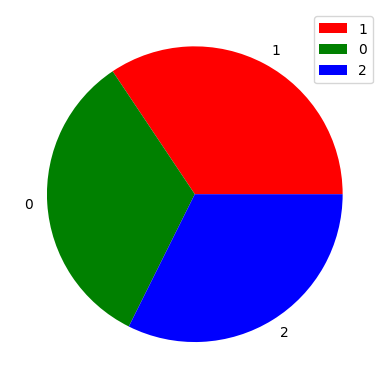

In [67]:
import matplotlib.pyplot as plt
import numpy as np

s = data['Contract Length'].value_counts()
x = s.index
y = s.values

a = np.array(y)
lb = x
clr = ["red","green","blue"]
plt.pie(a,labels = lb,colors=clr)
plt.legend(lb)
plt.show()

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         64374 non-null  int64
 1   Age                64374 non-null  int64
 2   Gender             64374 non-null  int64
 3   Tenure             64374 non-null  int64
 4   Usage Frequency    64374 non-null  int64
 5   Support Calls      64374 non-null  int64
 6   Payment Delay      64374 non-null  int64
 7   Subscription Type  64374 non-null  int64
 8   Contract Length    64374 non-null  int64
 9   Total Spend        64374 non-null  int64
 10  Last Interaction   64374 non-null  int64
 11  Churn              64374 non-null  int64
dtypes: int64(12)
memory usage: 5.9 MB


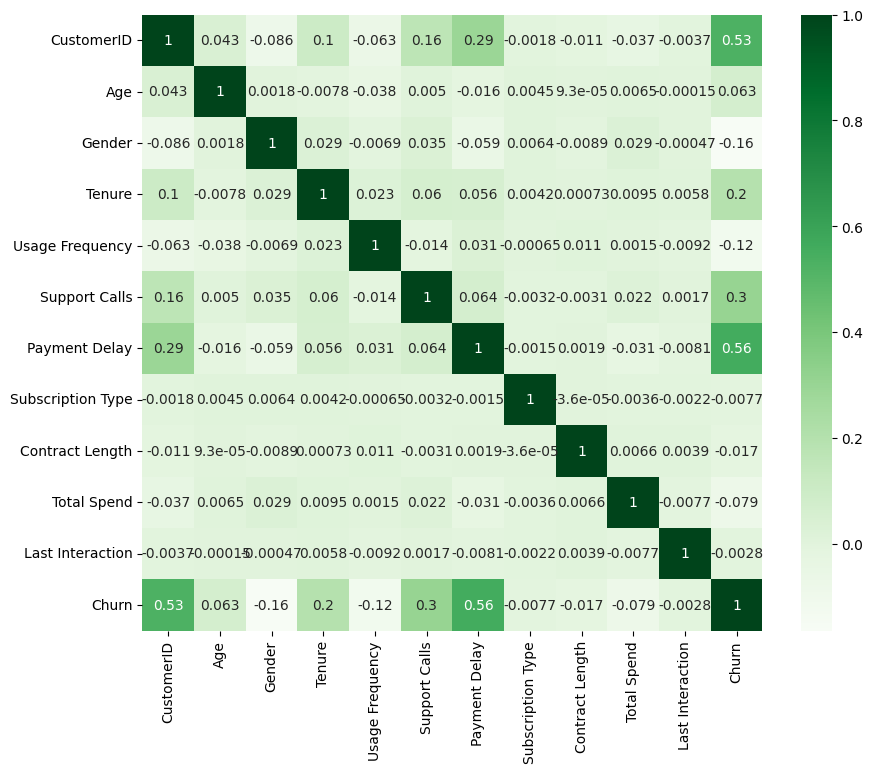

In [69]:
import seaborn as sns
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

In [70]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [71]:
# Filtration
X = data.drop(['CustomerID','Churn','Subscription Type','Contract Length', 'Total Spend', 'Last Interaction'],axis=1)
y = data['Churn']

In [72]:
# Assign inputs to X
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay
0,22,0,25,14,4,27
1,41,0,28,28,7,13
2,47,1,27,10,2,29
3,35,1,9,12,5,17
4,53,0,58,24,9,2


In [73]:
# Assign inputs to y
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train = ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [75]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

# Checking class distribution

print("Original:\n", y_train.value_counts())
print("Resampled:\n",pd.Series(y_train_resampled).value_counts())

Original:
 Churn
0    27088
1    24411
Name: count, dtype: int64
Resampled:
 Churn
0    27088
1    27088
Name: count, dtype: int64


In [76]:
# Train 4 models based on classification or regression 
# Test the models
# Get the accuracy
# Choose the model where you  get high accuracy

#LogisticRegression
from  sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train_resampled,y_train_resampled)
y_pred = lr.predict(X_test)

In [77]:
print(lr.score(X_train_resampled,y_train_resampled))
print(lr.score(X_test,y_test))

0.8227259303012404
0.827495145631068


In [78]:
from sklearn.metrics import accuracy_score
lr_ac = accuracy_score(y_test,y_pred)
lr_ac

0.827495145631068

In [79]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train_resampled,y_train_resampled)
y_pred = dtc.predict(X_test)

dtc_ac = accuracy_score(y_test,y_pred)
dtc_ac

0.9408155339805825

In [80]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_resampled,y_train_resampled)
y_pred=rfc.predict(X_test)

rfc_ac = accuracy_score(y_test,y_pred)
rfc_ac

0.9644271844660194

In [ ]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

svc_ac = accuracy_score(y_test,y_pred)
svc_ac

In [ ]:
# Create a predict function, use high accuracy model
def predict(values):
    result = rfc.predict(values)
    print(result)
    if result[0]==0:
        result = 'No Churn'
    elif result[0]==1:
        result = 'High Possibility of Churn '
    else:
        result = 'Error'
    return result

In [ ]:
# call the function by passing values and get the output

print(data.iloc[10])

CustomerID            11
Age                   46
Gender                 0
Tenure                42
Usage Frequency       27
Support Calls          9
Payment Delay         21
Subscription Type      2
Contract Length        0
Total Spend          526
Last Interaction       3
Churn                  1
Name: 10, dtype: int64


In [ ]:
new_data = [[46,0,42,27,9,21]]
prediction = rfc.predict(new_data)
prediction[0] 

np.int64(1)

In [ ]:
import pickle

with open(r'C:\Users\Pratiksha\OneDrive\Desktop\Churn_prediction - Copy\Churn_prediction\models\churn-prediction.pkl', 'wb') as file:
    pickle.dump(rfc,file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
import pickle

with open(r'C:\Users\Pratiksha\OneDrive\Desktop\Churn_prediction - Copy\Churn_prediction\models\churn-prediction-standard-scaler-1.pkl', 'wb') as file:
    pickle.dump(ss,file)

print("Standard Scaler saved successfully!")

Standard Scaler saved successfully!


In [ ]:
import sys
print(sys.version)

3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]


In [ ]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (51499, 6)
Testing data shape: (12875, 6)
